In [1]:
import numpy as np

from semantic_odes.api import CompositionMap, SinglePropertyMap, SemanticPredictor

In [2]:
composition_map = CompositionMap([
    ((-np.inf,1.4),('++c','+-h')),
    ((1.4,2.8),('+-h',)),
    ((2.8,np.inf),('-+h',))
])

In [3]:
property_map_1 = SinglePropertyMap(
    (-np.inf,1.4),
    (0.1,1.4),
    ('++c','+-h'),
    {
        (0,'t'):lambda x: np.zeros_like(x),
        (0,'x'):lambda x: x,
        (1,'t'):lambda x: np.log((2.8-x)/x),
        (1,'x'):lambda x: 1.4 * np.ones_like(x)
    },
    {
        ('start',1): lambda x: (x**2 * (2.8/x-1))/2.8,
        ('end',1): lambda x: np.ones_like(x)*2.8/4,
        ('end',2): lambda x: np.zeros_like(x)
    },
    [
        lambda x: np.ones_like(x)*2.8,
        lambda x: np.log((2.8-x)/x) + np.log(3)
        # lambda x: np.log(3) * np.ones_like(x)
    ]
)

In [4]:
property_map_2 = SinglePropertyMap(
    (1.4,2.8),
    (1.4,2.8),
    ('+-h',),
    {
        (0,'t'):lambda x: np.zeros_like(x),
        (0,'x'):lambda x: x,
    },
    {
        ('start',1): lambda x: np.ones_like(x) * np.nan,
        ('end',1): lambda x: (x**2 * (2.8/x-1))/2.8,
        ('end',2): lambda x: np.zeros_like(x)
    },
    [
        lambda x: np.ones_like(x)*2.8,
        lambda x: np.log((2.8+x)/x)
    ]
)

In [5]:
property_map_3 = SinglePropertyMap(
    (2.8,np.inf),
    (2.8,4.0),
    ('-+h',),
    {
        (0,'t'):lambda x: np.zeros_like(x),
        (0,'x'):lambda x: x,
    },
    {
        ('start',1): lambda x: np.ones_like(x) * np.nan,
        ('end',1): lambda x: (x**2 * (2.8/x-1))/2.8,
        ('end',2): lambda x: np.zeros_like(x)
    },
    [
        lambda x: np.ones_like(x)*2.8,
        lambda x: np.log((2.8+x)/x)
    ]
)

In [6]:
semantic_predictor = SemanticPredictor(
    composition_map,
    [property_map_1,property_map_2,property_map_3],
    (0,4)
)

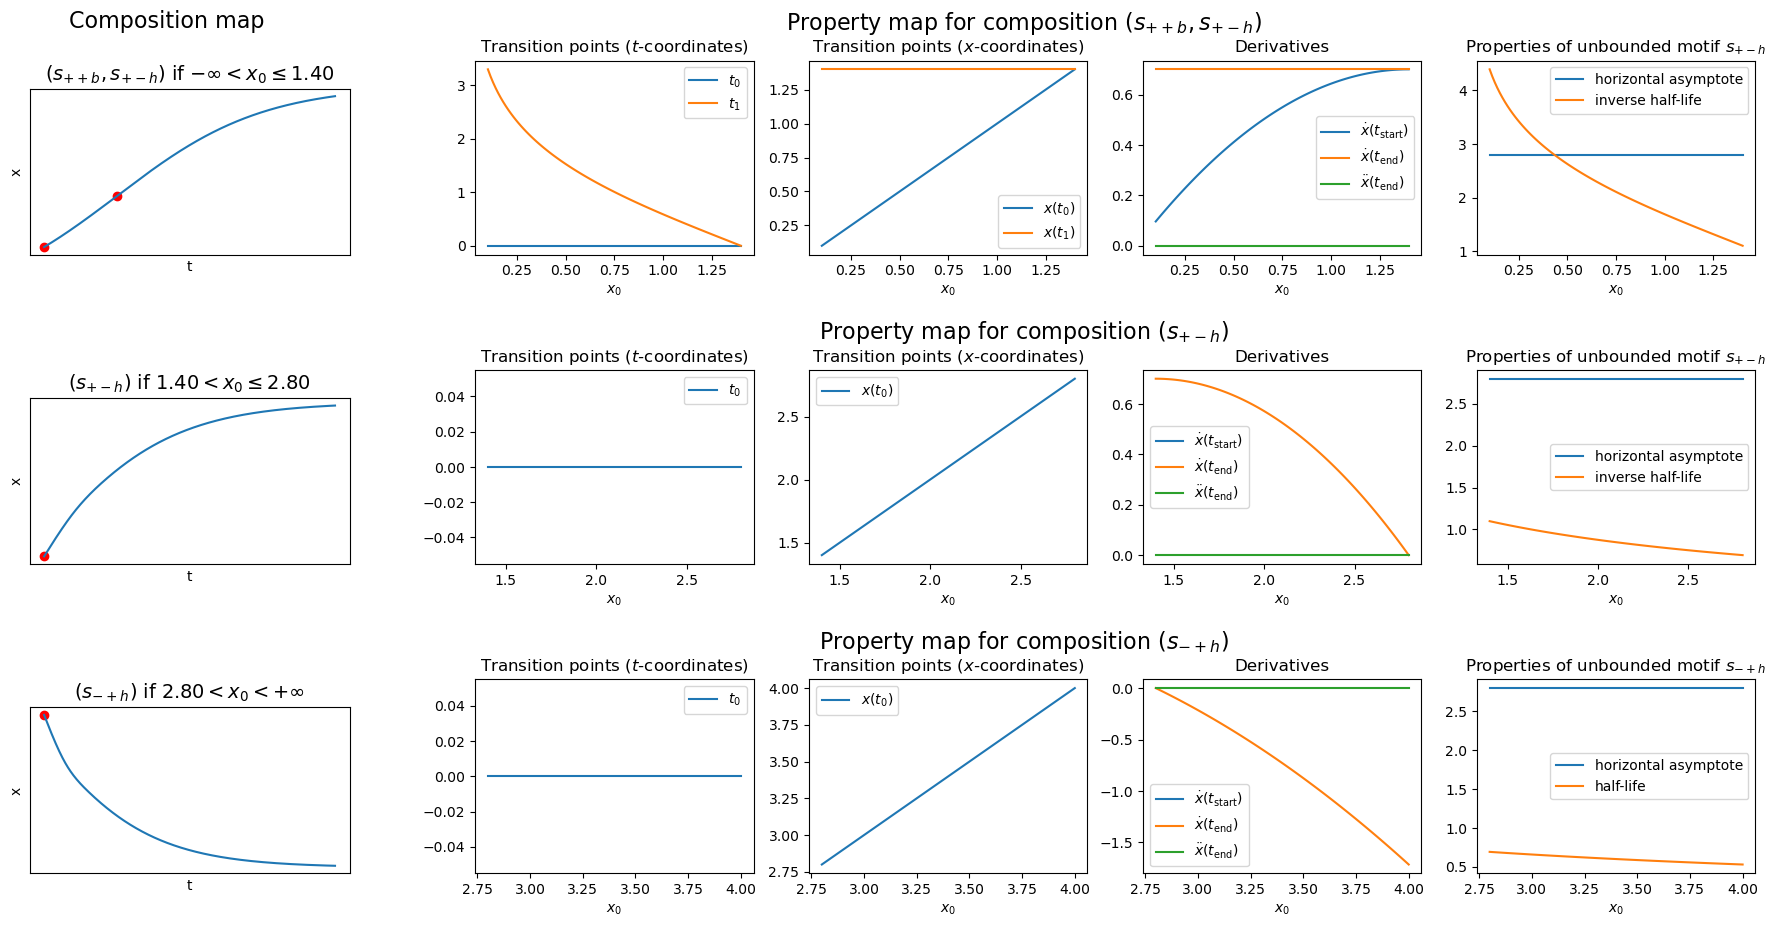

In [11]:
semantic_predictor.visualize_thin((0,4), property_map_figsize=(16,3),composition_map_figsize=(4,3))
# save_fig
import matplotlib.pyplot as plt
plt.savefig('output/Semantic representation logistic growth (Fig 9).pdf')

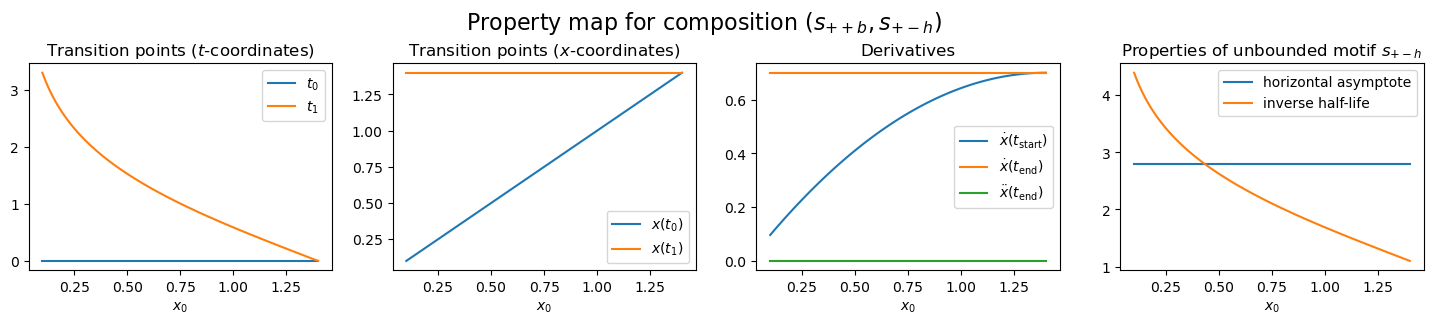

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,3))
property_map_1._visualize_1d_layout(fig)

# save the figure
plt.savefig('output/Property map logistic growth (Fig 5).pdf', bbox_inches='tight')